## Imports

In [19]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

## EDA

In [3]:
dataset_path = r'E:\Projects\Wound-Classification-DL\data\Categorized Wound Images Dataset'
folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

print(f'Number of classes: {len(folders)}')
print('Classes:', folders)

Number of classes: 10
Classes: ['Abrasions', 'Bruises', 'Burns', 'Cut', 'Diabetic Wounds', 'Laseration', 'Normal', 'Pressure Wounds', 'Surgical Wounds', 'Venous Wounds']


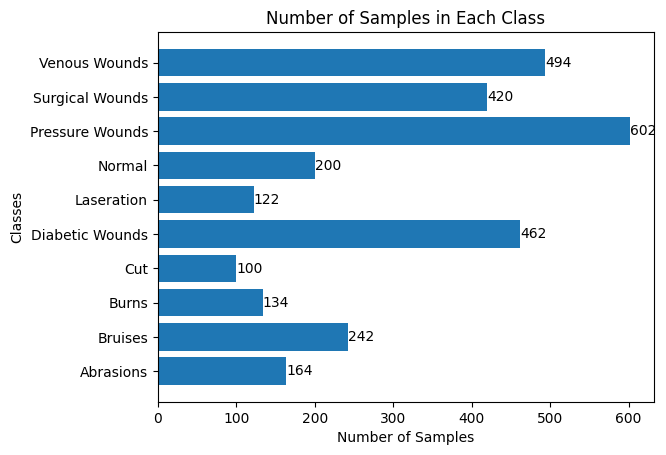

In [6]:
file_counts = {folder: len(os.listdir(os.path.join(dataset_path, folder))) for folder in folders}

plt.barh(list(file_counts.keys()), list(file_counts.values()))
for index, value in enumerate(file_counts.values()):
    plt.text(value, index, str(value), va='center')

plt.xlabel('Number of Samples')
plt.ylabel('Classes')
plt.title('Number of Samples in Each Class')
plt.show()

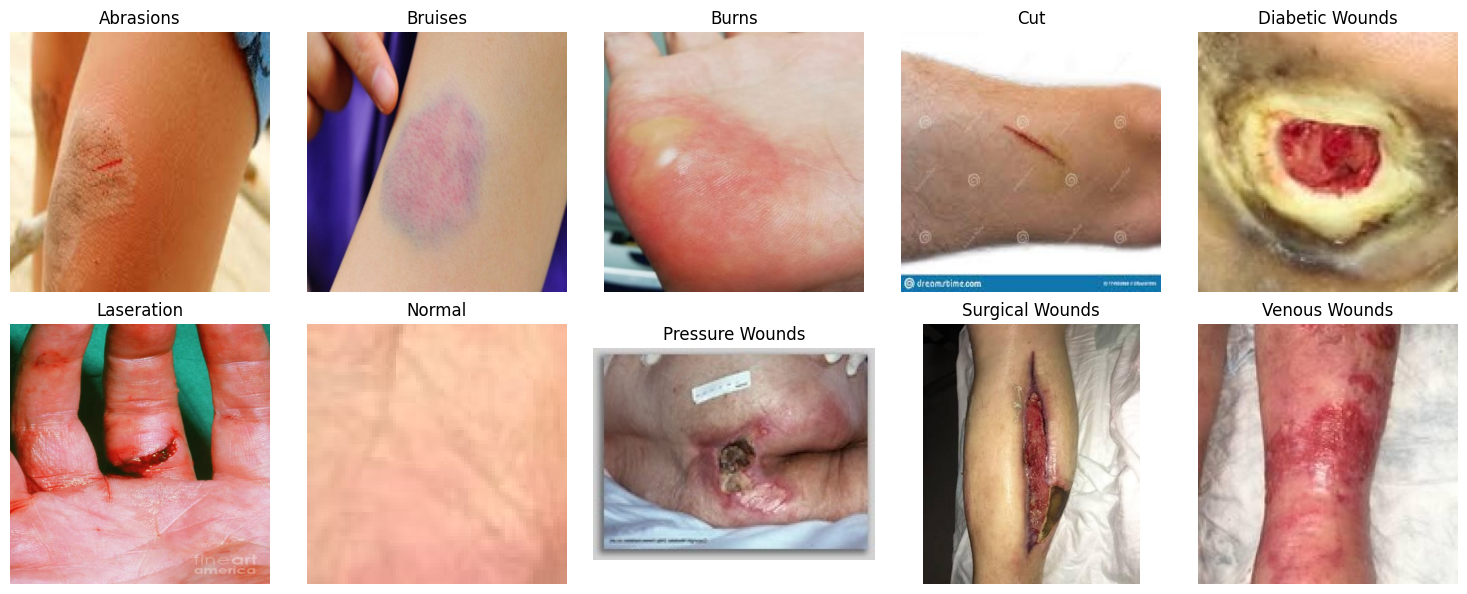

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, folder in enumerate(folders[:10]):
    folder_path = os.path.join(dataset_path, folder)
    sample_file = np.random.choice(os.listdir(folder_path))
    sample_path = os.path.join(folder_path, sample_file)
    
    img = Image.open(sample_path)
    axes[i].imshow(img)
    axes[i].set_title(folder)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [26]:
image_properties = []

for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        with Image.open(file_path) as img:
            width, height = img.size
            aspect_ratio = width / height
            image_properties.append((folder, width, height, aspect_ratio))

df_properties = pd.DataFrame(image_properties, columns=['Class', 'Width', 'Height', 'Aspect Ratio'])

summary = df_properties.describe()

unique_aspect_ratios = df_properties['Aspect Ratio'].unique()

df_properties.groupby('Class').describe()

Width                                                        \
                 count        mean         std    min     25%    50%     75%   
Class                                                                          
Abrasions        164.0  640.000000    0.000000  640.0  640.00  640.0  640.00   
Bruises          242.0  640.000000    0.000000  640.0  640.00  640.0  640.00   
Burns            134.0  502.179104  219.879866  154.0  154.00  640.0  640.00   
Cut              100.0  640.000000    0.000000  640.0  640.00  640.0  640.00   
Diabetic Wounds  462.0  168.670996   50.114706   85.0  144.25  154.0  189.75   
Laseration       122.0  640.000000    0.000000  640.0  640.00  640.0  640.00   
Normal           200.0  156.250000  190.185383   61.0  111.25  129.5  150.00   
Pressure Wounds  602.0  168.641196   40.532613   78.0  154.00  154.0  173.00   
Surgical Wounds  420.0  333.580952  457.132701   66.0  154.00  189.0  286.00   
Venous Wounds    494.0  213.870445   81.471952   75.0  140.00  216.0  270.00   

                        Height              ...                 Aspect Ratio  \
                    max  count        mean  ...     75%     max        count   
Class                                       ...                                
Abrasions         640.0  164.0  640.000000  ...  640.00   640.0        164.0   
Bruises           640.0  242.0  640.000000  ...  640.00   640.0        242.0   
Burns             640.0  134.0  488.597015  ...  640.00   640.0        134.0   
Cut               640.0  100.0  640.000000  ...  640.00   640.0        100.0   
Diabetic Wounds   463.0  462.0  159.497835  ...  191.50   432.0        462.0   
Laseration        640.0  122.0  640.000000  ...  640.00   640.0        122.0   
Normal           1534.0  200.0  159.970000  ...  152.50  1724.0        200.0   
Pressure Wounds   320.0  602.0  147.983389  ...  178.00   338.0        602.0   
Surgical Wounds  2624.0  420.0  323.019048  ...  277.00  2932.0        420.0   
Venous Wounds     513.0  494.0  220.894737  ...  271.75   513.0        494.0   

                                                                             \
                     mean       std       min       25%       50%       75%   
Class                                                                         
Abrasions        1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
Bruises          1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
Burns            1.128226  0.205373  1.000000  1.000000  1.000000  1.412844   
Cut              1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
Diabetic Wounds  1.087272  0.180223  0.698630  1.000000  1.000000  1.012686   
Laseration       1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
Normal           1.008802  0.120257  0.703297  0.928610  1.000000  1.088938   
Pressure Wounds  1.182263  0.182970  0.848958  1.000000  1.222222  1.339130   
Surgical Wounds  1.096145  0.189727  0.749415  1.000000  1.000000  1.316239   
Venous Wounds    0.984960  0.089728  0.567227  0.986671  1.000000  1.000000   

                           
                      max  
Class                      
Abrasions        1.000000  
Bruises          1.000000  
Burns            1.555556  
Cut              1.000000  
Diabetic Wounds  1.555556  
Laseration       1.000000  
Normal           1.390805  
Pressure Wounds  1.555556  
Surgical Wounds  1.495146  
Venous Wounds    1.333333  

[10 rows x 24 columns]

In [23]:
unique_classes = df_properties.groupby('Class').first().reset_index()
unique_classes

,Class,Width,Height,Aspect Ratio
0,Abrasions,640,640,1.000000
1,Bruises,640,640,1.000000
2,Burns,640,640,1.000000
3,Cut,640,640,1.000000
4,Diabetic Wounds,98,98,1.000000
5,Laseration,640,640,1.000000
6,Normal,95,95,1.000000
7,Pressure Wounds,218,218,1.000000
8,Surgical Wounds,209,219,0.954338
9,Venous Wounds,299,337,0.887240
